Exercicio 3 
Ana Moreira e Damião Goes

In [1]:
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots

In [ ]:
df = pd.read_csv("C:/Users/HP/OneDrive/Ambiente de Trabalho/Python/assigment02/greends-avcad-2024/greends-avcad-2024/examples/EFIplus_medit.zip", sep=';', encoding='latin1')
print(df)
df.head(10)
df.info()
print(list(df.columns))
     

In [4]:
# let's rename some columns so that they make sense
df.rename(columns={'Sum of Run1_number_all':'Total_fish_individuals'}, inplace=True) # inplace="True"

# let's see the first few rows of the data
df.head(10)

# let's see the last few rows of the data
df.tail(10)

# let's see the summary statistics of the data
df.describe()

,Latitude,Longitude,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,Calib_morphol,Calib_wqual,Geomorph1,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
count,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,4.615000e+03,...,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000
mean,41.660286,-4.220392,0.288964,0.790860,0.278388,0.811814,0.403313,0.460387,0.497306,4.550399e-12,...,0.000399,0.085412,0.000599,0.000399,0.012373,0.000200,0.196568,0.068250,0.132708,0.031132
std,1.654641,4.754419,0.453327,0.406735,0.448250,0.390900,0.490611,0.498478,0.500043,1.000108e+00,...,0.019976,0.279522,0.024463,0.019976,0.110554,0.014127,0.397442,0.252199,0.339293,0.173690
min,36.213984,-9.459453,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.465112e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.450919,-7.716600,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.129179e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.316060,-6.176062,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.515341e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.904789,-1.959129,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.319150e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,45.098423,15.625773,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.345204e-01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# for sake of consistency, let's also make all column labels of type string
df.columns = list(map(str, df.columns))
# Check data types
pd.options.display.max_rows = 154 # maximum number of rows displayed.
df.dtypes
# Number of values per variable
df.count() 

# Let's check the number of missing values in the data set
df.isnull().sum()

# Let's check the number of missing values in the data set
df.isnull().sum()



Site_code               0
Latitude                0
Longitude               0
Country                 0
Catchment_name          0
                       ..
Zingel asper            0
Squalius sp             0
Barbatula sp            0
Phoxinus sp             0
Iberochondrostoma_sp    0
Length: 164, dtype: int64

In [7]:
df2 = df.dropna(how='all') # drops rows when all elements are missing values
df2.info()


df2 = df.dropna(how='all', axis=1) # drops columns when at least one element is a missing value
df2.info()

df2 = df.dropna() # drops rows when at least one element is a missing value
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 6.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 6.3+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 2822 entries, 18 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 3.6+ MB


In [9]:
df2 = df.dropna(thresh=2) # drops rows that have less than 2 real values
df2.info()

df2 = df.dropna(subset=['Catchment_name']) # drops rows where data in specific columns are missing
df2.info()

print(df['Catchment_name'].mode())

# A fast way of getting a summary statistics of quantitative data (int or float)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 6.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5011 entries, 0 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 6.3+ MB
0    Ebro
Name: Catchment_name, dtype: object


,Latitude,Longitude,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,Calib_morphol,Calib_wqual,Geomorph1,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
count,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,4.615000e+03,...,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000,5011.000000
mean,41.660286,-4.220392,0.288964,0.790860,0.278388,0.811814,0.403313,0.460387,0.497306,4.550399e-12,...,0.000399,0.085412,0.000599,0.000399,0.012373,0.000200,0.196568,0.068250,0.132708,0.031132
std,1.654641,4.754419,0.453327,0.406735,0.448250,0.390900,0.490611,0.498478,0.500043,1.000108e+00,...,0.019976,0.279522,0.024463,0.019976,0.110554,0.014127,0.397442,0.252199,0.339293,0.173690
min,36.213984,-9.459453,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.465112e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.450919,-7.716600,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.129179e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,42.316060,-6.176062,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.515341e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.904789,-1.959129,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.319150e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,45.098423,15.625773,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.345204e-01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df2.describe() # after dropping NaNs

country_count = pd.crosstab(index = df['Country'], columns='count')
print(country_count)


col_0     count
Country        
France       72
Italy       185
Portugal    867
Spain      3887


In [11]:
catchment_count = pd.crosstab(index = df['Catchment_name'], columns='count')
print(catchment_count)

col_0                  count
Catchment_name              
Algarve-Sotavento          6
Algarve-barlavento        10
Arno-Ombrone               2
Campania-South            19
Cantabrica               502
Catala                   242
Corse                      5
Douro                    401
Ebro                     736
EntreDouroeVouga           2
Galiza-Norte             709
Galiza-Sul                95
Garonne                    3
Guadalquivir              63
Guadia                   313
Italia-Veneto              1
Jucar                    103
Jucar-Ebro                52
Minho                    707
Mira                       5
Mondego                   86
Odelouca                  40
Oeste                     33
Ombrone                    5
Ombrone-Tevere             6
Rhone                     16
Sado                       9
Saline-Pescara-Sangro     29
Sardinia                  17
Segura                    42
Segura-Jucar               7
South_France_E            23
South_France_W

C:\Users\HP\AppData\Local\Temp\ipykernel_15200\3292491121.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df_selected, x="Catchment_name", y='temp_ann', ax=axs[0], palette='Set2', size=10, jitter=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_15200\3292491121.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_selected, x="temp_ann", y="Catchment_name", ax=axs[1], palette='Set3', kde=True)
C:\Users\HP\AppData\Local\Temp\ipykernel_15200\3292491121.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_selected, x="Catchment_name", y='temp_ann', ax=axs[2], palette='Set1')


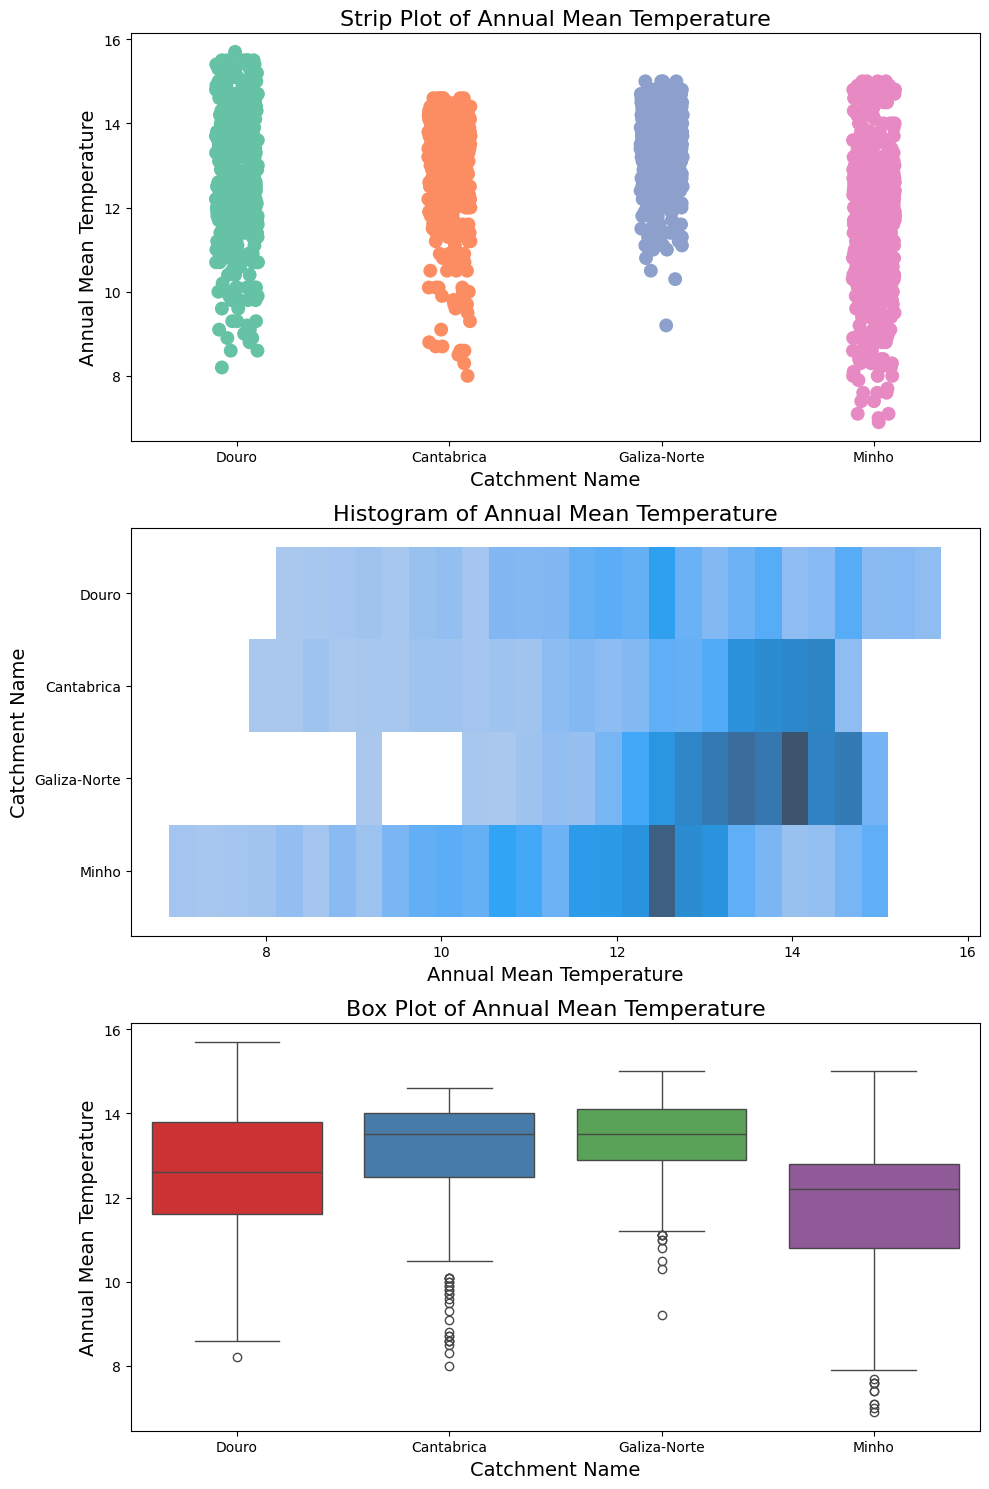

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

catchments = ['Minho', 'Douro', 'Galiza-Norte', "Cantabrica"]
df_selected = df[df['Catchment_name'].isin(catchments)]

fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Gráfico 1: Strip plot
sns.stripplot(data=df_selected, x="Catchment_name", y='temp_ann', ax=axs[0], palette='Set2', size=10, jitter=True)
axs[0].set_title('Strip Plot of Annual Mean Temperature', fontsize=16)
axs[0].set_xlabel('Catchment Name', fontsize=14)
axs[0].set_ylabel('Annual Mean Temperature', fontsize=14)

# Gráfico 2: Histograma
sns.histplot(data=df_selected, x="temp_ann", y="Catchment_name", ax=axs[1], palette='Set3', kde=True)
axs[1].set_title('Histogram of Annual Mean Temperature', fontsize=16)
axs[1].set_xlabel('Annual Mean Temperature', fontsize=14)
axs[1].set_ylabel('Catchment Name', fontsize=14)

# Gráfico 3: Box plot
sns.boxplot(data=df_selected, x="Catchment_name", y='temp_ann', ax=axs[2], palette='Set1')
axs[2].set_title('Box Plot of Annual Mean Temperature', fontsize=16)
axs[2].set_xlabel('Catchment Name', fontsize=14)
axs[2].set_ylabel('Annual Mean Temperature', fontsize=14)

plt.tight_layout()
plt.show()